In [2]:
# Import required libraries

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import joblib
import matplotlib.pyplot as plt

In [ ]:
# oad Train/Test Data
X_train = pd.read_csv("../data/X_train.csv")
X_test = pd.read_csv("../data/X_test.csv")
y_train = pd.read_csv("../data/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/y_test.csv").values.ravel()

In [ ]:
# Baseline Model (Before Tuning)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

r2_before = r2_score(y_test, y_pred)
mae_before = mean_absolute_error(y_test, y_pred)
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred))

print("🔹 Baseline Random Forest Performance:")
print(f"R²: {r2_before:.3f}, MAE: {mae_before:.3f}, RMSE: {rmse_before:.3f}")

🔹 Baseline Random Forest Performance:
R²: 0.970, MAE: 12.182, RMSE: 17.974


In [ ]:
# Define Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
# Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='r2'
)

grid_search.fit(X_train, y_train)

print("\nBest Parameters Found:")
print(grid_search.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits

✅ Best Parameters Found:
{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
# Evaluate Tuned Model
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

r2_after = r2_score(y_test, y_pred_tuned)
mae_after = mean_absolute_error(y_test, y_pred_tuned)
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print("\n🔹 Tuned Random Forest Performance:")
print(f"R²: {r2_after:.3f}, MAE: {mae_after:.3f}, RMSE: {rmse_after:.3f}")


🔹 Tuned Random Forest Performance:
R²: 0.950, MAE: 16.295, RMSE: 22.997


In [ ]:
# Compare Before vs After
results = pd.DataFrame({
    'Metric': ['R² Score', 'MAE', 'RMSE'],
    'Before Tuning': [r2_before, mae_before, rmse_before],
    'After Tuning': [r2_after, mae_after, rmse_after]
})

print("\nComparison:")
print(results)


Comparison:
     Metric  Before Tuning  After Tuning
0  R² Score       0.969625      0.950274
1       MAE      12.182105     16.294952
2      RMSE      17.973728     22.997003


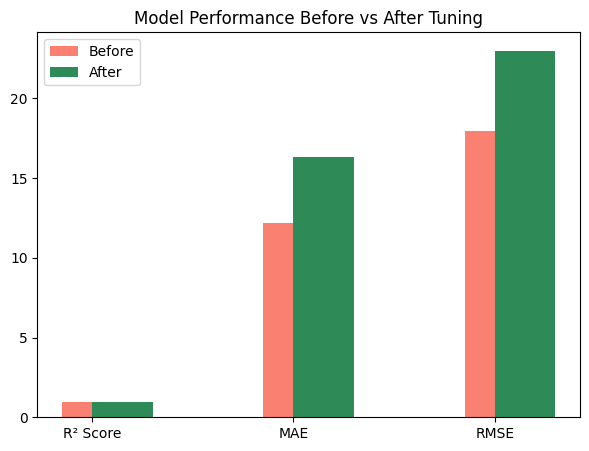

In [ ]:
# Visualization
plt.figure(figsize=(7, 5))
plt.bar(results['Metric'], results['Before Tuning'], color='salmon', width=0.3, label='Before')
plt.bar(results['Metric'], results['After Tuning'], color='seagreen', width=0.3, label='After', align='edge')
plt.title("Model Performance Before vs After Tuning")
plt.legend()
plt.show()

In [ ]:
# Save Tuned Model
joblib.dump(best_rf, "../models/random_forest_tuned_ev_range.pkl")
print("\nTuned model saved as '../models/random_forest_tuned.pkl'")


Tuned model saved as '../models/random_forest_tuned.pkl'


### Hyperparameter tuning was performed using GridSearchCV. However, the tuned model showed slightly lower accuracy, suggesting the base Random Forest parameters were already optimal for this dataset